In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
from scipy.stats import poisson
import scipy.stats as stats
from scipy.spatial import distance
from dragsUtility import * 
import json
import twitter
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

In [2]:
df = pd.read_csv('Data/rutweet.csv')
graph = nx.from_pandas_edgelist(df, source="source", target="target", edge_attr="weight", create_using=nx.DiGraph)

# Preprocessing

Rimozione dei cappi

In [3]:
graph.remove_edges_from(nx.selfloop_edges(graph))

Cartoon Network

# Network info

In [4]:
print("Number of nodes {}".format(graph.order()))
print("Number of edges {}".format(graph.size()))

Number of nodes 22670
Number of edges 48325


In [5]:
nx.is_directed_acyclic_graph(graph)

False

In [6]:
print("Density {}".format(nx.density(graph)))

Density 9.403466465078659e-05


## Degree Analysis

### In-Degree + Out-Degree = Degree

Media, mediana, deviazione standard, range interquartile, minimo e massimo sono dei buoni indici per riassumere la distribuzione.

In [7]:
degrees = list(dict(graph.degree(weight="weight")).values())

print('Mean degree: \t'+ str(np.mean(degrees)))
print('Standard deviation: ' + str(np.std(degrees)))
print('Median: ' + str(np.median(degrees)))
print('iqr: ' + str(np.quantile(degrees, 0.75) - np.quantile(degrees, 0.25)))
print('Min: ' + str(np.min(degrees)))
print('Max: ' + str(np.max(degrees)))

Mean degree: 	5.067137185707984
Standard deviation: 84.14736370546478
Median: 2.0
iqr: 2.0
Min: 0
Max: 9698


In [8]:
random_graph_erdos = nx.fast_gnp_random_graph(len(graph.nodes), nx.density(graph))
random_degrees = list(dict(random_graph_erdos.degree()).values())

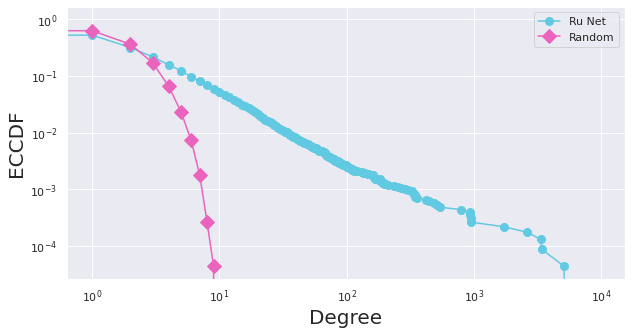

In [9]:
cdf = ECDF(degrees)
x = np.unique(degrees)
y = cdf(x)

cdf_random = ECDF(random_degrees)
x_random = np.unique(random_degrees)
y_random = cdf_random(x_random)
 
fig_cdf_fb = plt.figure(figsize=(10,5))
axes = fig_cdf_fb.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,1-y,marker='o',ms=8, linestyle='-', label = "Ru Net", color = "#61CAE2")
axes.loglog(x_random,1-y_random,marker='D',ms=10, linestyle='-', label="Random", color = "#EA63BD")
axes.legend()
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECCDF', size = 20)
plt.savefig("Images/DegreeDistribution.png", dpi=1200, bbox_inches='tight')
plt.show()

### In-Degree

In [10]:
in_degrees_noitems =  dict(graph.in_degree(weight='weight'))
in_degrees = list(in_degrees_noitems.values())


print('Mean degree: \t'+ str(np.mean(in_degrees)))
print('Standard deviation: ' + str(np.std(in_degrees)))
print('Median: ' + str(np.median(in_degrees)))
print('iqr: ' + str(np.quantile(in_degrees, 0.75) - np.quantile(in_degrees, 0.25)))
print('Min: ' + str(np.min(in_degrees)))
print('Max: ' + str(np.max(in_degrees)))

Mean degree: 	2.533568592853992
Standard deviation: 83.69730576458063
Median: 0.0
iqr: 0.0
Min: 0
Max: 9657


Il nodo con in-degree più alto è un partecipante?

In [11]:
pippo = dict(graph.in_degree(weight="weight"))
sortedPippo = {k: v for k, v in sorted(pippo.items(), key=lambda item: item[1], reverse=True)}
dragsUtility= DragsUtility()
dragsUtility.isaDrag(str(list(sortedPippo.keys())[0]))

False

In [12]:
random_digraph_erdos = nx.fast_gnp_random_graph(len(graph.nodes), nx.density(graph), directed=True)
random_in_degrees = list(dict(random_digraph_erdos.in_degree(weight="weight")).values())

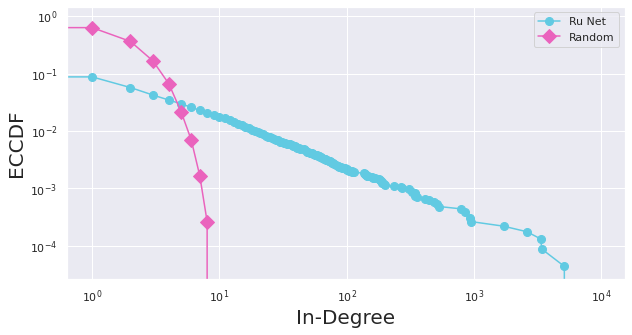

In [13]:
cdf = ECDF(in_degrees)
x = np.unique(in_degrees)
y = cdf(x)

cdf_random = ECDF(random_in_degrees)
x_random = np.unique(random_in_degrees)
y_random = cdf_random(x_random)
 
fig_cdf_fb = plt.figure(figsize=(10,5))
axes = fig_cdf_fb.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,1-y,marker='o',ms=8, linestyle='-', label = "Ru Net", color = "#61CAE2")
axes.loglog(x_random,1-y_random,marker='D',ms=10, linestyle='-', label="Random", color = "#EA63BD")
axes.legend()
axes.set_xlabel('In-Degree',size=20)
axes.set_ylabel('ECCDF', size = 20)
plt.savefig("Images/InDegreeDistribution.png", dpi=1200, bbox_inches='tight')
plt.show()

### Out-degree

In [14]:
out_degrees_dict = dict(graph.out_degree(weight="weight"))
out_degrees = list(out_degrees_dict.values())

print('Mean degree: \t'+ str(np.mean(out_degrees)))
print('Standard deviation: ' + str(np.std(out_degrees)))
print('Median: ' + str(np.median(out_degrees)))
print('iqr: ' + str(np.quantile(out_degrees, 0.75) - np.quantile(out_degrees, 0.25)))
print('Min: ' + str(np.min(out_degrees)))
print('Max: ' + str(np.max(out_degrees)))


Mean degree: 	2.533568592853992
Standard deviation: 4.58445213047373
Median: 1.0
iqr: 2.0
Min: 0
Max: 165


In [15]:
random_out_degrees = list(dict(random_digraph_erdos.out_degree(weight="weight")).values())

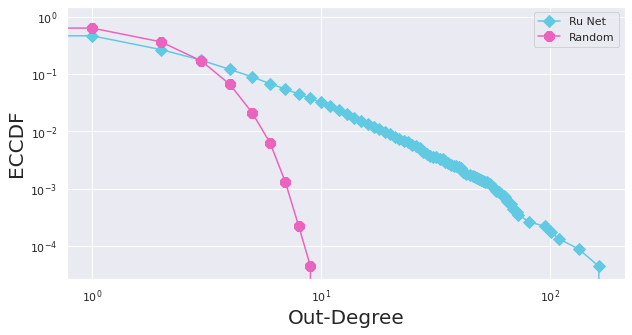

In [16]:
cdf = ECDF(out_degrees)
x = np.unique(out_degrees)
y = cdf(x)

cdf_random = ECDF(random_out_degrees)
x_random = np.unique(random_out_degrees)
y_random = cdf_random(x_random)
 
fig_cdf_fb = plt.figure(figsize=(10,5))
axes = fig_cdf_fb.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,1-y,marker='D',ms=8, linestyle='-', label = "Ru Net", color = "#61CAE2")
axes.loglog(x_random,1-y_random,marker='8',ms=10, linestyle='-', label="Random", color = "#EA63BD")
axes.legend()
axes.set_xlabel('Out-Degree',size=20)
axes.set_ylabel('ECCDF', size = 20)
plt.savefig("Images/OutDegreeDistribution.png", dpi=1200, bbox_inches='tight')
plt.show()

Text(0, 0.5, 'ECCDF')

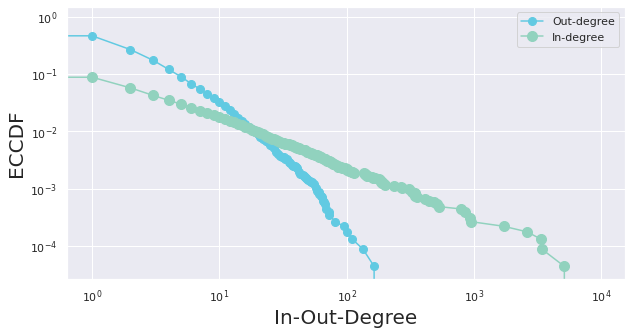

In [17]:
cdf_out = ECDF(out_degrees)
x_out = np.unique(out_degrees)
y_out = cdf_out(x_out)

cdf_in = ECDF(in_degrees)
x_in = np.unique(in_degrees)
y_in = cdf_in(x_in)
 
fig_cdf_fb = plt.figure(figsize=(10,5))
axes = fig_cdf_fb.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x_out,1-y_out,marker='o',ms=8, linestyle='-', label = "Out-degree", color = "#61CAE2")
axes.loglog(x_in,1-y_in,marker='o',ms=10, linestyle='-', label="In-degree", color = "#91D2BE")
axes.legend()
axes.set_xlabel('In-Out-Degree',size=20)
axes.set_ylabel('ECCDF', size = 20)

## Connectivity

In [18]:
nx.is_strongly_connected(graph),nx.is_weakly_connected(graph)

(False, False)

C'è una giant componenent?

In [19]:
components_strong =  nx.strongly_connected_components(graph)
components_weak =  nx.weakly_connected_components(graph)

component_list_strong = list(components_strong)
component_list_weak = list(components_weak)

Numero delle componenti connesse:

In [20]:
len(component_list_strong)

22005

In [21]:
len(component_list_weak)

306

In [22]:
len_cc = [len(wcc) for wcc in component_list_weak]
counts = pd.Series(len_cc).value_counts().sort_index()

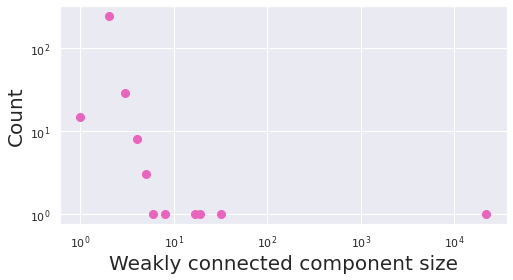

In [23]:
fig_gc = plt.figure(figsize=(8,4))
axes = fig_gc.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(counts.index,counts.values,marker='o',ms=8, linestyle='None', color = "#EA63BD")
axes.set_xlabel('Weakly connected component size',size=20)
axes.set_ylabel('Count', size = 20)
plt.savefig("Images/ConnectedComponents.png", dpi=1200, bbox_inches='tight')
plt.show()

## Small World

In [24]:
sorted_components = sorted(component_list_weak, key = lambda x : len(x), reverse=True)
giant_component = graph.subgraph(sorted_components[0]).to_undirected()
# nx.diameter(giant_component)

E' 12 il diametro

## Transitivity

In [25]:
# global_clustering_coeff = nx.transitivity(graph.to_undirected())
# print("Coefficiente di Clustering globale: {}".format(global_clustering_coeff))

Coefficiente di Clustering globale: 0.0016440739612106675

In [26]:
# avg_local_clustering_coeff = nx.average_clustering(graph.to_undirected())
# avg_local_clustering_coeff0 = nx.average_clustering(graph.to_undirected(), count_zeros=False)

# print('Coefficiente di clustering locale medio: {}'.format(avg_local_clustering_coeff))
# print('Coefficiente di clustering locale medio >0 : {}'.format(avg_local_clustering_coeff0))

Coefficiente di clustering locale medio: 0.18450772763547055

Coefficiente di clustering locale medio >0 : 0.5825613071721611

## Reciprocity

In [27]:
print('Reciprocità: {}'.format(nx.overall_reciprocity(graph)))

Reciprocità: 0.010263838592860838


Very low reciprocity is typical of an information network.

# Centrality

In [33]:
p99_indeg = np.percentile(in_degrees,99.9)
influencers_id = [(str(k),v) for k,v in in_degrees_noitems.items() if v>=p99_indeg]

In [34]:
bearer_token = json.load(open('application_keys.json'))['twitter']['bearer_token']
twitter_api = twitter.Twitter(auth=twitter.OAuth2(bearer_token=bearer_token))

In [35]:
in_deg_cen = nx.in_degree_centrality(graph)
out_deg_cen =  nx.out_degree_centrality(graph)

In [37]:
influencers_username_centrality = [(twitter_api.users.show(user_id=k)['screen_name'],v,\
                                    in_deg_cen[int(k)],out_degrees_dict[int(k)], out_deg_cen[int(k)], dragsUtility.isaDrag(str(k))) for (k,v) in influencers_id]

In [38]:
influencers_table = pd.DataFrame(influencers_username_centrality,\
                                 columns=['user','in_degree','in_degree_centrality','out_degree','out_degree_centrality','isaCompetitor'])
influencers_table.set_index('user',inplace=True)
influencers_table.sort_values(by='in_degree_centrality',inplace=True,ascending=False)

In [39]:
influencers_table

,in_degree,in_degree_centrality,out_degree,out_degree_centrality,isaCompetitor
user,,,,,
RuPaulsDragRace,9657,0.306763,41,0.000794,False
the_symonee,5118,0.175041,1,0.000044,True
gottmik,3337,0.114826,18,0.000573,True
TheKandyMuse,3403,0.103842,15,0.000309,True
denalifox,2604,0.085800,6,0.000221,True
omgheyrose,1706,0.059023,3,0.000132,True
MissLaLaRi,953,0.038687,1,0.000044,True
jaidaehall,924,0.034055,27,0.000750,False
QueenUtica,924,0.033614,0,0.000000,True


In [40]:
influencers_table.to_csv('toTable/influencers.csv')

Tra gli influencer non ci sono tutti i partecipanti

In [41]:
ranking_by_degree_centrality = influencers_table.loc[influencers_table['isaCompetitor'] == True]
ranking_by_degree_centrality

,in_degree,in_degree_centrality,out_degree,out_degree_centrality,isaCompetitor
user,,,,,
the_symonee,5118,0.175041,1,0.000044,True
gottmik,3337,0.114826,18,0.000573,True
TheKandyMuse,3403,0.103842,15,0.000309,True
denalifox,2604,0.085800,6,0.000221,True
omgheyrose,1706,0.059023,3,0.000132,True
MissLaLaRi,953,0.038687,1,0.000044,True
QueenUtica,924,0.033614,0,0.000000,True
TheOliviaLux,482,0.017910,1,0.000044,True


In [42]:
len(ranking_by_degree_centrality)

8

In [43]:
contestant_degree = list(filter(lambda x: dragsUtility.isaDrag(str(x[0])),list(in_degrees_noitems.items())))

In [44]:
contestant_degree_centrality = [( dragsUtility.getInfoAboutQueenByID(str(k))["Name"] ,v,\
                                    in_deg_cen[int(k)],out_degrees_dict[int(k)], out_deg_cen[int(k)]) for (k,v) in contestant_degree]

In [45]:
contestant_degree_table = pd.DataFrame(contestant_degree_centrality,\
                                 columns=['contestant','in_degree','in_degree_centrality','out_degree','out_degree_centrality'])
contestant_degree_table.sort_values(by='in_degree_centrality',inplace=True,ascending=False)
contestant_degree_table

,contestant,in_degree,in_degree_centrality,out_degree,out_degree_centrality
2,Symone,5118,0.175041,1,0.000044
0,Gottmik,3337,0.114826,18,0.000573
3,Kandy Muse,3403,0.103842,15,0.000309
1,Denali Foxx,2604,0.085800,6,0.000221
7,Rosé,1706,0.059023,3,0.000132
5,LaLa Ri,953,0.038687,1,0.000044
9,Utica Queen,924,0.033614,0,0.000000
6,Olivia Lux,482,0.017910,1,0.000044
4,Tina Burner,233,0.009528,1,0.000044
12,Kahmora Hall-Iman,85,0.003441,5,0.000221


In [46]:
centrality_rankings = {}
centrality_rankings['in_degree_centrality'] = list(contestant_degree_table["contestant"])

**PageRank**

In [47]:
# pagerank = nx.pagerank(graph, alpha=0.9, weight="weight")
# pagerank2 = list(filter(lambda x: dragsUtility.isaDrag(str(x[0])), pagerank.items()))
# contestant_pagerank = [ (dragsUtility.getInfoAboutQueenByID(str(k))["Name"], v) for (k,v) in pagerank2]

In [48]:
# contestant_pagerank = list(sorted( contestant_pagerank,key=lambda x: x[1], reverse=True))
# centrality_rankings['pageRank'] = [ k for (k,v) in contestant_pagerank]
# centrality_rankings['pageRank']

**Betweenness Centrality**

In [49]:
# beetweeness = nx.betweenness_centrality(graph, weight="weight")
# beetweeness2 = list(filter(lambda x: dragsUtility.isaDrag(str(x[0])), beetweeness.items()))
# contestant_beetweeness = [ (dragsUtility.getInfoAboutQueenByID(str(k))["Name"], v) for (k,v) in beetweeness2]

In [50]:
# contestant_beetweeness = list(sorted( contestant_beetweeness,key=lambda x: x[1], reverse=True))
# centrality_rankings['betweenness_centrality'] = [ k for (k,v) in contestant_beetweeness]
# centrality_rankings['betweenness_centrality']

**Harmonic Centrality**

In [51]:
sources = list(filter(lambda x: dragsUtility.isaDrag(str(x)),list(graph.nodes)))

In [52]:
# harmonic = nx.harmonic_centrality(graph, nbunch=sources)
# harmonic2 = list(harmonic.items())
# contestant_harmonic = [ (dragsUtility.getInfoAboutQueenByID(str(k))["Name"], v) for (k,v) in harmonic2]

In [53]:
# contestant_harmonic = list(sorted( contestant_harmonic, key=lambda x: x[1], reverse=True))
# centrality_rankings['harmonic_centrality'] = [ k for (k,v) in contestant_harmonic]
# centrality_rankings['harmonic_centrality']

In [54]:
# harmonic_df = pd.DataFrame(contestant_harmonic, columns=["contestant", "harmonic_centrality"])
# harmonic_df.to_csv("harmonic_final.csv", index=False)

In [55]:
# import json
# with open('Data/rankings.json', 'w') as f:
#     json.dump(centrality_rankings, f, indent=1)

In [56]:
centrality_table = pd.read_json('Data/rankings.json')
centrality_table["real_rank"] = dragsUtility.getRealRanking()
centrality_table = centrality_table[['real_rank', 'in_degree_centrality', 'pageRank', 'betweenness_centrality', 'harmonic_centrality']]

centrality_table

,real_rank,in_degree_centrality,pageRank,betweenness_centrality,harmonic_centrality
0,Symone,Symone,Denali Foxx,Gottmik,Symone
1,Kandy Muse,Gottmik,Kandy Muse,Kandy Muse,Kandy Muse
2,Gottmik,Kandy Muse,Symone,Denali Foxx,Denali Foxx
3,Rosé,Denali Foxx,Rosé,Rosé,Rosé
4,Olivia Lux,Rosé,Gottmik,Symone,Gottmik
5,Utica Queen,LaLa Ri,Utica Queen,LaLa Ri,Utica Queen
6,Tina Burner,Utica Queen,LaLa Ri,Olivia Lux,LaLa Ri
7,Denali Foxx,Olivia Lux,Tina Burner,Tina Burner,Tina Burner
8,Elliott with 2 Ts,Tina Burner,Olivia Lux,Kahmora Hall-Iman,Olivia Lux
9,LaLa Ri,Kahmora Hall-Iman,Joey Jay,Elliott with 2 Ts,Kahmora Hall-Iman


In [58]:
centrality_table = pd.read_json('Data/rankings.json')
centrality_table["real_rank"] = dragsUtility.getRealRanking()
centrality_table.to_csv("toTable/rankings.csv")

## Distanze delle classifiche

In [59]:
def get_distances(rank, real_rank):
    tau, p_value = stats.kendalltau(rank, real_rank)
    return {"kendall_tau": tau, "hamming": 1 - (distance.hamming(rank, real_rank))}

In [60]:
distance_json = {}
real_rank = dragsUtility.getRealRanking()
distance_json["in_degree_centrality"] = get_distances(list(centrality_table["in_degree_centrality"]), real_rank)
distance_json["pageRank"] = get_distances(list(centrality_table["pageRank"]), real_rank)
distance_json["betweenness_centrality"] = get_distances(list(centrality_table["betweenness_centrality"]), real_rank)
distance_json["harmonic_centrality"] = get_distances(list(centrality_table["harmonic_centrality"]), real_rank)
distance_json["DB"] = get_distances(dragsUtility.getDBRanking(), real_rank)
distance_json["age"] = get_distances(dragsUtility.getAgeRankig(), real_rank)
distance_json["real"] = get_distances(real_rank, real_rank)
distance_json

{'in_degree_centrality': {'kendall_tau': -0.025641025641025637,
  'hamming': 0.07692307692307687},
 'pageRank': {'kendall_tau': -0.15384615384615383,
  'hamming': 0.23076923076923073},
 'betweenness_centrality': {'kendall_tau': 0.07692307692307691,
  'hamming': 0.23076923076923073},
 'harmonic_centrality': {'kendall_tau': 0.10256410256410255,
  'hamming': 0.3076923076923077},
 'DB': {'kendall_tau': 0.12820512820512817, 'hamming': 0.23076923076923073},
 'age': {'kendall_tau': -0.10256410256410255, 'hamming': 0.07692307692307687},
 'real': {'kendall_tau': 0.9999999999999998, 'hamming': 1.0}}

In [61]:
distance_table = pd.DataFrame.from_dict(distance_json, orient='index')
distance_table

,kendall_tau,hamming
in_degree_centrality,-0.025641,0.076923
pageRank,-0.153846,0.230769
betweenness_centrality,0.076923,0.230769
harmonic_centrality,0.102564,0.307692
DB,0.128205,0.230769
age,-0.102564,0.076923
real,1.000000,1.000000


In [62]:
distance_table.to_csv("toTable/distance.csv")

## Jaccard Similarity

In [63]:
def structural_equivalence_jaccard(graph, node1, node2):
    neighbourn1, neighbourn2 = set(graph[node1].keys()),set(graph[node2].keys())
    union = len(neighbourn1.union(neighbourn2))
    inter = len(neighbourn1.intersection(neighbourn2))
    return (inter/union) if (union > 0) else 0

In [64]:
sources = list(filter(lambda x: dragsUtility.isaDrag(str(x)),list(graph.nodes)))

In [65]:
similarity = [ tuple( ([dragsUtility.getInfoAboutQueenByID(str(node1))["Name"]] + [ structural_equivalence_jaccard(graph.to_undirected(), node1, node2) for node2 in sources ] )) \
              for node1 in sources]

In [66]:
sources_names = [ dragsUtility.getInfoAboutQueenByID(str(drag))["Name"] for drag in sources]

In [67]:
data = pd.DataFrame(similarity, columns= ["contestant"] + sources_names)
data = data.set_index("contestant")

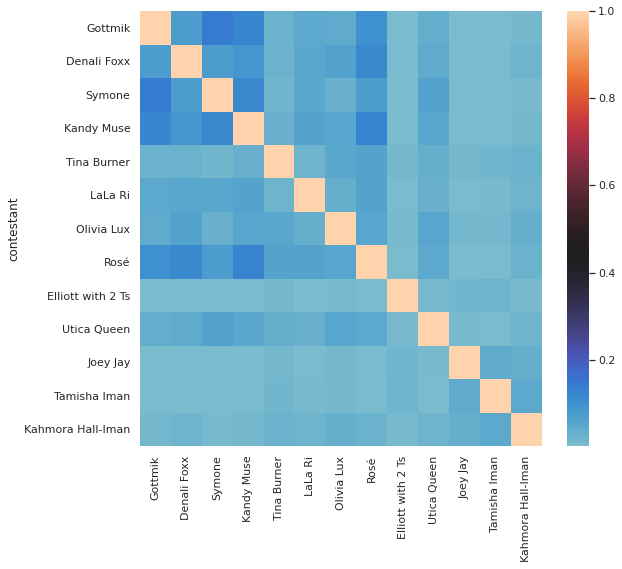

In [68]:
fig, ax = plt.subplots(figsize=(9,8)) 
ax = sns.heatmap(data, center = 0.45)
plt.savefig("Images/StructuralSimilarity.png", dpi=1200, bbox_inches='tight')
plt.show()